<a href="https://colab.research.google.com/github/GallardoCoriaMarcelo/Laboratorios/blob/main/Ej01_Ev_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import pandas as pd

# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/DatasetsFinal/data_9.csv', header=None)
df = df.loc[[0, 1]]
print(df.head())

    0      1      2      3      4      5      6      7      8      9     ...  \
0    0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0  ...   
1  234.0  134.0  167.0  234.0  134.0  167.0  234.0  134.0  167.0  234.0  ...   

     3062    3063    3064    3065    3066    3067    3068    3069    3070  \
0  3062.0  3063.0  3064.0  3065.0  3066.0  3067.0  3068.0  3069.0  3070.0   
1   255.0   255.0   255.0   255.0   255.0   255.0   255.0   255.0   255.0   

     3071  
0  3071.0  
1   255.0  

[2 rows x 3072 columns]


Dimensiones de la imagen reconstruida: (32, 32, 3)
Tipo de datos de la imagen: uint8


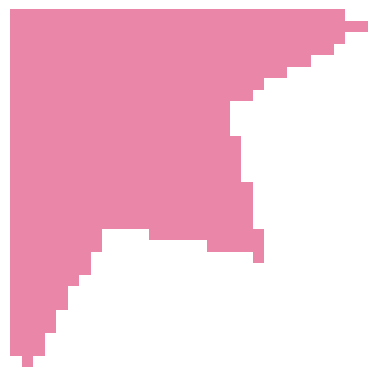

In [6]:
import numpy as np

# Obtener los valores de píxeles de la imagen del DataFrame
pixel_values = df.iloc[1].values  # Obtiene los valores de la segunda fila (índice 1)

# Convertir a un array de numpy y ajustar la forma para la imagen 32x32x3
image = np.array(pixel_values, dtype=np.uint8).reshape((32, 32, 3))

# Mostrar información sobre la imagen
print(f"Dimensiones de la imagen reconstruida: {image.shape}")
print(f"Tipo de datos de la imagen: {image.dtype}")

# Puedes mostrar la imagen usando bibliotecas de visualización como matplotlib
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Supongamos que tienes 10 clases
num_classes = 10

# Definir el modelo
model = models.Sequential([
    # Capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Capa de pooling
    layers.MaxPooling2D((2, 2)),
    # Capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Capa de pooling
    layers.MaxPooling2D((2, 2)),
    # Capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Capa de aplanamiento (flatten)
    layers.Flatten(),
    # Capa densamente conectada
    layers.Dense(64, activation='relu'),
    # Capa de salida
    layers.Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
from sklearn.cluster import KMeans

# Convertir los datos de píxeles en un formato adecuado para K-means
pixel_values = pixel_values.reshape((-1, 3))  # Reshape para tener una matriz de píxeles RGB

# Número estimado de clusters (clases potenciales)
num_clusters = 5  # Por ejemplo, inicialmente asumimos 5 clases

# Aplicar K-means para agrupar los píxeles en clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pixel_values)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


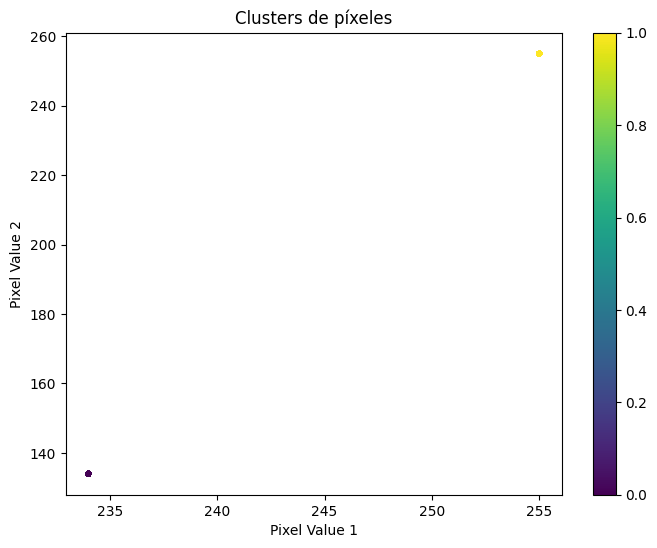

In [8]:
import matplotlib.pyplot as plt

# Visualización de los clusters (solo para propósitos ilustrativos)
plt.figure(figsize=(8, 6))
plt.scatter(pixel_values[:, 0], pixel_values[:, 1], c=cluster_labels, s=10, cmap='viridis')
plt.title('Clusters de píxeles')
plt.xlabel('Pixel Value 1')
plt.ylabel('Pixel Value 2')
plt.colorbar()
plt.show()


In [18]:
# Etiquetar la única imagen basada en los clusters identificados
# Esto es un ejemplo y se debe hacer de manera más elaborada en un caso real
# Supongamos que asignamos etiquetas manualmente a partir de la visualización anterior
labels = [0, 1, 0, 1, 2, 2, 3, 3, 4, 4, 3, 2, 1, 0, 4, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4]

# Preparar los datos para entrenamiento supervisado
X_train = np.array([pixel_values])
y_train = np.array([labels])

# Verificar las dimensiones de los datos
print('Dimensiones de X_train:', X_train.shape)
print('Dimensiones de y_train:', y_train.shape)


Dimensiones de X_train: (1, 1024, 3)
Dimensiones de y_train: (1, 25)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el clasificador (por ejemplo, KNeighborsClassifier)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Supongamos que tenemos una nueva imagen para clasificar (simulada)
new_image = np.array([[pixel_values]])

# Predecir la clase de la nueva imagen
predicted_class = clf.predict(new_image)

print('Clase predicha para la nueva imagen:', predicted_class)


Dimensiones de X_train: (1024, 3)
Dimensiones de y_train: (25,)


ValueError: Found input variables with inconsistent numbers of samples: [1024, 25]